In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

Import Data

In [93]:
# convert json to csv file
# df = pd.read_json('./db.json')
# df.to_csv('./db.csv', index=False)

df = pd.read_csv('./db.csv')


In [94]:
df.head(5)

,TotalEmployees,TotalEmployeesIndia,Rating,UrlName,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,Age,ShortName,Logo,HQCountry,headquaters,CompanyJobsLive,HQUrlName,CompanyId,location_count,industry_string,Subscribed
0,100001+,100001+,3.92,tcs,Public,Tata Consultancy Services,41589,394003,2783,54,TCS,tcs,India,"Mumbai,Maharashtra",55,mumbai,42,240,"BPO / Call Centre,IT Services & Consulting",0
1,100001+,100001+,4.14,accenture,Public,Accenture,27770,268685,2177,33,Accenture,accenture,Ireland,"Dublin,Dublin",7294,NaN,273,132,"IT Services & Consulting,Software Product",0
2,100001+,100001+,3.94,cognizant,Private,Cognizant,25176,272214,1748,28,Cognizant,cognizant-technology-solutions,United States (USA),"Teaneck,New Jersey",316,NaN,43,88,IT Services & Consulting,0
3,50001-100000,50001-100000,4.02,icici-bank,Public,ICICI Bank,32063,100049,940,28,ICICI Bank,icici_bank,India,"Mumbai,Maharashtra",150,mumbai,134,995,"Financial Services,Banking",0
4,100001+,100001+,3.93,wipro,Public,Wipro,23674,200635,1819,77,Wipro,wipro,India,"Bangalore/Bengaluru,Karnataka",520,bengaluru,44,254,IT Services & Consulting,0


In [95]:
# show number of null value in each column
df.isnull().sum()

TotalEmployees               830
TotalEmployeesIndia         1624
Rating                         0
UrlName                        0
CompanyType                 1565
Name                           0
CompanyReviewsLive             0
CompanySalaries                0
InterviewExperiencesLive       0
Age                            0
ShortName                      0
Logo                         349
HQCountry                    363
headquaters                  315
CompanyJobsLive                0
HQUrlName                   3738
CompanyId                      0
location_count                 0
industry_string              118
Subscribed                     0
dtype: int64

## Kiểm tra dữ liệu trống ở các cột

In [96]:
df.apply(lambda x :(x.isnull().mean())*100)

TotalEmployees               8.309972
TotalEmployeesIndia         16.259511
Rating                       0.000000
UrlName                      0.000000
CompanyType                 15.668803
Name                         0.000000
CompanyReviewsLive           0.000000
CompanySalaries              0.000000
InterviewExperiencesLive     0.000000
Age                          0.000000
ShortName                    0.000000
Logo                         3.494193
HQCountry                    3.634361
headquaters                  3.153785
CompanyJobsLive              0.000000
HQUrlName                   37.424910
CompanyId                    0.000000
location_count               0.000000
industry_string              1.181418
Subscribed                   0.000000
dtype: float64

## Preprocessing
### Làm tròn rating

Text(0, 0.5, 'Number of company')

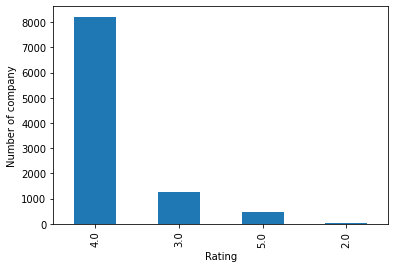

In [97]:
# round rating to nearest integer
df['Rating'] = df['Rating'].round()

df.Rating.value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of company')

In [98]:
df.TotalEmployees = df.TotalEmployees.replace({'100001+': 100001, '10000+': 10000})

df.TotalEmployees = df.TotalEmployees.replace({
    '50001-100000': np.floor((50001 + 100000) / 2),
    '10001-50000': np.floor((10001 + 50000) / 2),
    '5001-10000': np.floor((5001 + 10000) / 2),
    '1001-5000': np.floor((1001 + 5000) / 2),
    '501-1000': np.floor((501 + 1000) / 2),
    '201-500': np.floor((201 + 500) / 2),
    '51-200': np.floor((51 + 200) / 2),
    '11-50': np.floor((11 + 50) / 2),
    '1-10': np.floor((1 + 10) / 2),
    })

df.TotalEmployees.unique()

 



array([100001, 75000.0, 30000.0, 7500.0, 3000.0, nan, '39576', 750.0,
       350.0, 125.0, 30.0, 10000, 5.0, '94072'], dtype=object)

## Drop redundant columns

In [99]:
# drop redundant columns
df = df.drop(['UrlName', 'ShortName', 'Logo', 'HQUrlName', 'Subscribed'], axis=1)